# EDA on 🛣️ SDOT - Vechicle Collision

<img src = "https://i.postimg.cc/Tw7Txd01/image.png">

## 🚧 Why This Analysis Matters

Traffic accidents aren't just numbers—they're life-altering events. From tragic fatalities to expensive vehicle repairs and lasting injuries, road collisions impose a heavy toll on individuals and communities alike. But what if we could better understand the causes behind them—and maybe even prevent some?

This analysis dives deep into a rich dataset provided by the **Seattle Department of Transportation (SDOT)**, capturing detailed records of vehicle collisions across the city. By examining when, where, and how these accidents happen—and what the surrounding conditions were like—we aim to uncover hidden patterns and relationships.

Through data cleaning, smart visualizations, and statistical testing, we’ll explore:

* 🌧️ Are certain **weather, light, or road conditions** more likely to cause serious accidents?

* 🚗 What **types of collisions** happen most frequently—and where?
* ⏰ Is there a clear pattern in accident frequency based on **time of day** or **day of the week**?
* 🚨 How significant is **speeding** as a factor in severe crashes?
* 🧍 Are **pedestrian-involved collisions** more dangerous under specific conditions?
* 📍 Which **neighborhoods or intersections** are hotspots for recurring incidents?
* 📉 Has accident frequency **increased or decreased** over the years—especially from **2020 to 2023**?
* 🚦 Do poor **light conditions** (e.g., dark or dusk) lead to more serious collisions?
* 🧪 Are there **statistically significant relationships** between accident severity and environmental factors?
* 🧭 How do collisions vary by **direction of travel** or **vehicle movement**?
* 💥 What is the distribution of **injury types**, and how often do they result in fatalities?
* 🔍 Can we identify any **seasonal or monthly patterns** that correlate with risk?

By answering these questions, we’re not just analyzing data—we're revealing insights that could inform safer road designs, targeted public safety campaigns, and smarter transportation policies. In short, this isn't just about Seattle—it's about understanding what makes roads safer, everywhere.

In [ ]:
# Download essential packages
!pip install -q gdown pandas matplotlib seaborn

## 1. 📚 Importing Libraries

To begin our analysis and visualization, we’ll import the essential Python libraries.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## 2. 📂 Load & Preview the Data

Since we previously cleaned and transformed the data 🧹, this version should be much easier to work with — with fewer missing values, clearer columns, and ready for some insightful Exploratory Data Analysis (EDA)!

In [ ]:
# Download the cleaned dataset
!gdown https://drive.google.com/file/d/1VIlAl08S1N_-wyYSxw1AuBDiiXr-sN7u/view?usp=sharing --fuzzy

In [ ]:
# Load data
df = pd.read_csv(
    "SDOT_Collisions_2019_24.csv",
    low_memory=False    # Prioritize type consistency over memory optimization while loading
)

# View first 5 rows in a dataframe
df.head()

,OBJECTID,ADDRTYPE,LOCATION,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,x,y,MONTH,YEAR,TIMEOFDAY
0,6452334,Block,E BOSTON ST BETWEEN 14TH AVE E AND 15TH AVE E,1,Other,1,0,0,1,0,...,N,Clear,Wet,Dark - Street Lights On,Y,1.275366e+06,236187.648934,12,2022,Late Night
1,6452335,Intersection,ARBORETUM DR E AND LAKE WASHINGTON BLVD E,1,Rear Ended,2,0,0,2,0,...,N,Clear,Dry,Daylight,N,1.280244e+06,232549.364834,1,2023,Morning
2,6452338,Block,S MICHIGAN ST BETWEEN EAST MARGINAL WAY S AND ...,1,Sideswipe,3,0,0,2,0,...,N,Clear,Dry,Daylight,N,1.270689e+06,202435.972355,9,2023,Noon
3,6452339,Block,QUEEN ANNE AVE N BETWEEN CROCKETT ST AND BOSTO...,1,Parked Car,2,0,0,2,0,...,N,Raining,Wet,Dark - Street Lights On,N,1.264818e+06,236358.887974,1,2023,Evening
4,6452340,Intersection,34TH AVE NE AND NE 75TH ST,1,Sideswipe,3,0,0,2,0,...,N,Clear,Dry,Daylight,N,1.281245e+06,252558.066615,8,2023,Evening


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31620 entries, 0 to 31619
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OBJECTID         31620 non-null  int64  
 1   ADDRTYPE         31560 non-null  object 
 2   LOCATION         31472 non-null  object 
 3   SEVERITYCODE     31620 non-null  object 
 4   COLLISIONTYPE    31620 non-null  object 
 5   PERSONCOUNT      31620 non-null  int64  
 6   PEDCOUNT         31620 non-null  int64  
 7   PEDCYLCOUNT      31620 non-null  int64  
 8   VEHCOUNT         31620 non-null  int64  
 9   INJURIES         31620 non-null  int64  
 10  SERIOUSINJURIES  31620 non-null  int64  
 11  FATALITIES       31620 non-null  int64  
 12  JUNCTIONTYPE     31322 non-null  object 
 13  UNDERINFL        31620 non-null  object 
 14  WEATHER          31513 non-null  object 
 15  ROADCOND         31589 non-null  object 
 16  LIGHTCOND        31524 non-null  object 
 17  SPEEDING    

## [About SOTD Data](https://www.seattle.gov/documents/Departments/SDOT/GIS/Collisions_OD.pdf)

| Attribute         | Description                                                 |
|-------------------|-------------------------------------------------------------|
| ADDRTYPE          | Collision address type: __Alley__, __Block__, __Intersection__          |
| LOCATION          | Description of the general location of the collision         |
| SEVERITYCODE      | A code that corresponds to the severity of the collision: __`3`—fatality__, __`2b`—serious injury__, __`2`—injury__, __`1`—prop damage__, __`0`—unknown__ |
| COLLISIONTYPE     | Collision type                                              |
| PERSONCOUNT       | The total number of people involved in the collision        |
| PEDCOUNT          | The number of pedestrians involved in the collision         |
| PEDCYLCOUNT       | The number of bicycles involved in the collision            |
| VEHCOUNT          | The number of vehicles involved in the collision            |
| INJURIES          | The number of total injuries in the collision               |
| SERIOUSINJURIES  | The number of serious injuries in the collision             |
| FATALITIES        | The number of fatalities in the collision                   |
| JUNCTIONTYPE      | Category of junction at which collision took place          ||
| UNDERINFL         | Whether or not a driver involved was under the influence of drugs or alcohol |
| WEATHER           | A description of the weather conditions during the time of the collision |
| ROADCOND          | The condition of the road during the collision              |
| LIGHTCOND         | The light conditions during the collision                   |
| SPEEDING          | Whether or not speeding was a factor in the collision (Y/N) |


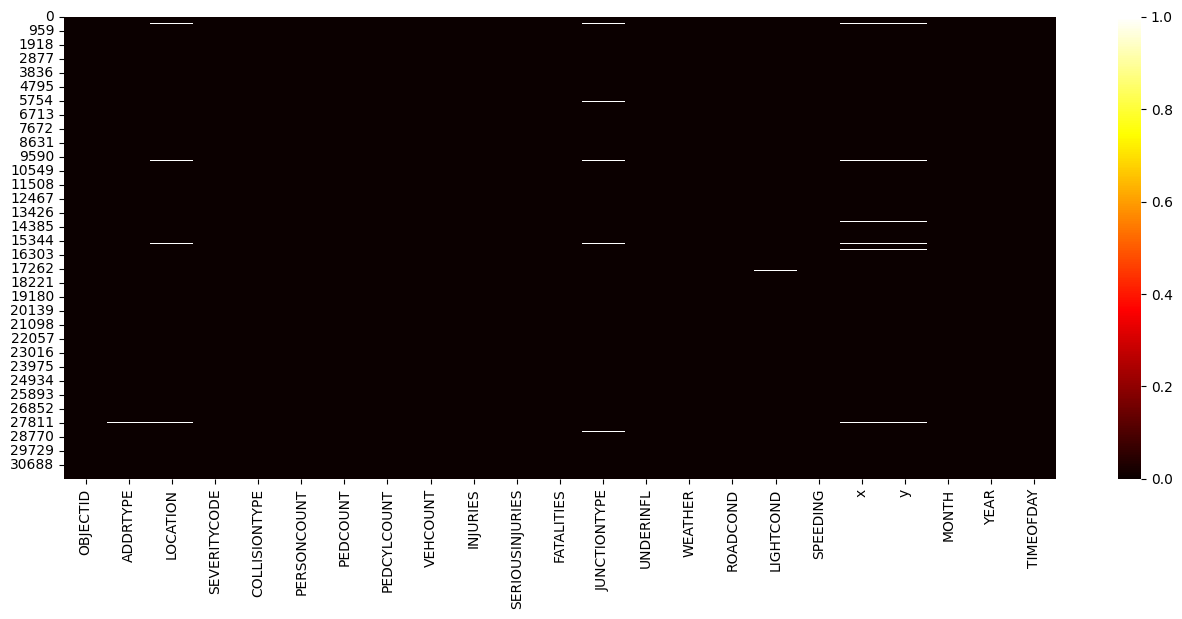

In [ ]:
# Visualize missing values using heatmaps
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cmap='hot')
plt.show();

## 3. 🔍 Basic Statistical Overview

To understand the dataset’s numerical features and their distributions, let’s view some key summary statistics by zooming in on critical columns related to the collision impact.

In [ ]:
df.describe()

,OBJECTID,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,x,y,MONTH,YEAR
count,3.162000e+04,31620.000000,31620.000000,31620.000000,31620.000000,31620.000000,31620.000000,31620.000000,3.136500e+04,31365.000000,31620.000000,31620.000000
mean,6.671214e+06,2.467331,0.061828,0.042631,1.941841,0.462176,0.033365,0.004238,1.271356e+06,228037.832045,6.439911,2020.773751
std,4.543569e+04,1.173401,0.255502,0.203587,0.667073,0.728873,0.196091,0.066881,7.360378e+03,21884.239647,3.387901,1.449067
min,6.452334e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.248139e+06,184189.713265,1.000000,2019.000000
25%,6.668842e+06,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.267282e+06,210223.946379,4.000000,2019.000000
50%,6.679172e+06,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.271209e+06,226739.552156,6.000000,2021.000000
75%,6.689891e+06,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.276131e+06,245411.094191,9.000000,2022.000000
max,6.700658e+06,49.000000,6.000000,3.000000,14.000000,14.000000,4.000000,2.000000,1.293052e+06,271525.414794,12.000000,2024.000000


#### Key Insights from stastical analysis of Seattle Collision Data 🚗📊

- **Most Crashes Are Minor:**
On average, collisions involve about **1.7 vehicles** and **2.2 people** (`VEHCOUNT` mean = 1.7, `PERSONCOUNT` mean = 2.2). This shows typical crashes are small-scale, everyday events.

- **Injuries Are Common but Mostly Mild:**
The average number of injuries per crash is **0.37** (`INJURIES` mean), meaning many collisions cause no injuries, but roughly **1 in 3** results in at least one injury (75th percentile = 1). Serious injuries (`SERIOUSINJURIES` mean = 0.017) and fatalities (`FATALITIES` mean = 0.002) are thankfully very rare.

- **Pedestrian and Cyclist Involvement Is Low:**
Pedestrians and cyclists are involved in only about **3.9%** and **2.8%** of crashes respectively (means near zero for `PEDCOUNT` = 0.039 and `PEDCYLCOUNT` = 0.028), but their vulnerability means these crashes are riskier.

- **Outliers Highlight Rare Major Incidents:**
Extreme max values like **93 people involved**, **78 injuries**, or **5 fatalities** (`PERSONCOUNT` max = 93, `INJURIES` max = 78, `FATALITIES` max = 5) point to unusual, large-scale crashes that need special attention.

## 4. Data Visualization

**Data visualization** is the graphical representation of data and information. It involves creating visual aids such as charts, graphs, maps, and other visual elements to help people understand and analyze complex data sets. The main goal of data visualization is to make it easier for people to comprehend large amounts of data and to identify patterns, trends, and insights that may not be immediately apparent when viewing raw data.

Effective data visualization involves selecting the appropriate type of visualization for the data set, using the right colors, labels, and other visual elements to communicate the information effectively, and ensuring that the visual representation is accurate and easy to interpret. Some popular tools used for data visualization include _Excel_, _Tableau_, and _Python libraries_ such as `Matplotlib`and `Seaborn`.

### 4.1 📊  Univariate Analysis

Let’s start exploring the dataset one variable at a time! 🔍
**Univariate analysis** helps us understand the distribution, central tendency, and spread of individual features in our dataset — like how many vehicles are typically involved in a collision or how often certain severity levels occur.

This step sets the stage for identifying patterns, spotting outliers, and understanding the overall shape of our data before we dive into deeper, multivariate relationships.

#### 4.1.1 Bar Charts
Bar charts use rectangular bars to represent the frequency or proportion of data points in different categories. They are useful for comparing data across different categories. Bar charts are a common and effective way to visually represent data, especially when you want to compare the values of different categories or groups. They use rectangular bars with lengths proportional to the values they represent, making it easy to compare the values of different categories at a glance.

Bar charts are also easy to create and understand, even for non-technical audiences. They can be customized with various colors, fonts, and styles to make them visually appealing and convey a specific message or highlight important data points.
</br>

**🚨 Visualizing the Distribution of Accidents occured by Collision Types**


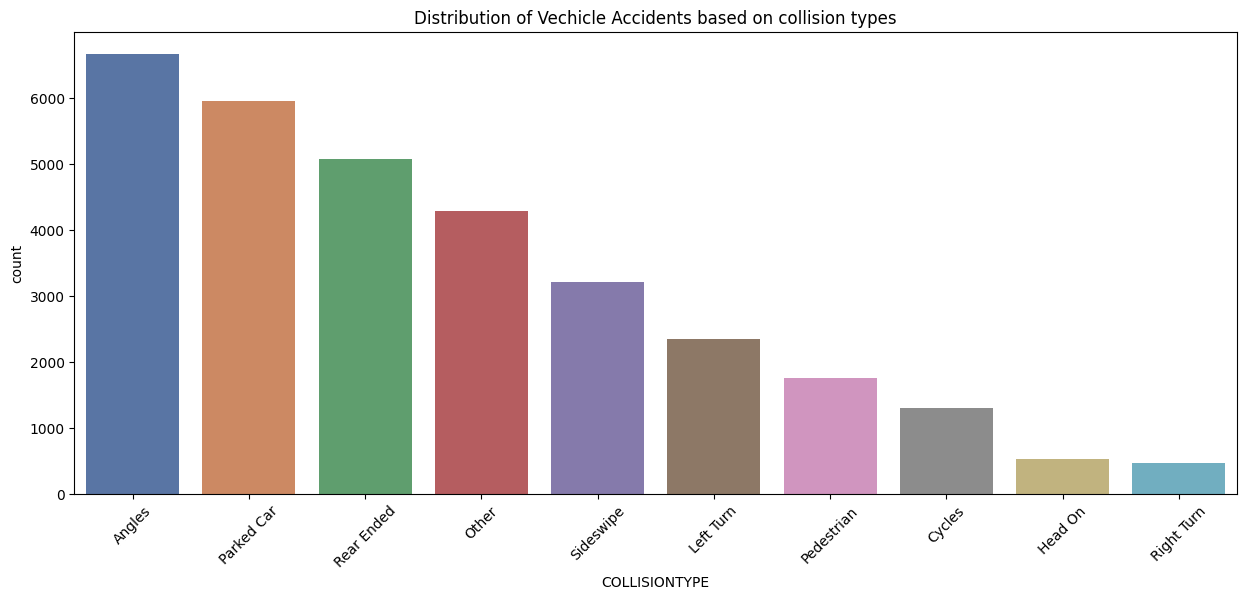

In [ ]:
# Filter the dataframe for a column values with their respective counts
filter_df = df["COLLISIONTYPE"].value_counts().reset_index()

# Choosing a color palette
color_palette = sns.color_palette("deep", len(filter_df))

# Creating a bar chart
plt.figure(figsize=(15, 6))
sns.barplot(data=filter_df, x=filter_df.columns[0], y=filter_df.columns[1],
            hue=filter_df.columns[0], palette=color_palette, legend=False)
plt.xticks(rotation=45)
plt.title("Distribution of Vechicle Accidents based on collision types")
plt.show()


**🚦 Collision Types — What’s Really Happening on the Roads?**

Collisions involving vehicles mostly occur due to the carelessness of one or multiple parties. Through the above plots, it can be seen that:

- 📐 **"Angle" Collisions Lead the Pack:** These are the most frequent crashes — likely happening at intersections where vehicles cross paths.

- 🚗💥 **"Parked Car" & "Rear-End" Incidents Are Everywhere:** A surprising number of accidents involve hitting parked cars or tailgating gone wrong. Both highlight lapses in attention and space management.

- 🚫 **"Head-On" and "Right Turn" Crashes Are Rare:** Fortunately, these more dangerous or specific types of collisions are far less common.
</br>

Further analysis is needed for specific collision types, such as angles, sideswipe, pedestrian:

- Whether angle-related collisions are due to speeding or not,

- Whether some collisions were influenced by both speeding and other factors,

- Whether certain harsh weather conditions were optimal for driving.


**🚨 Visualizing the Distribution of Accidents by Weather Conditions**

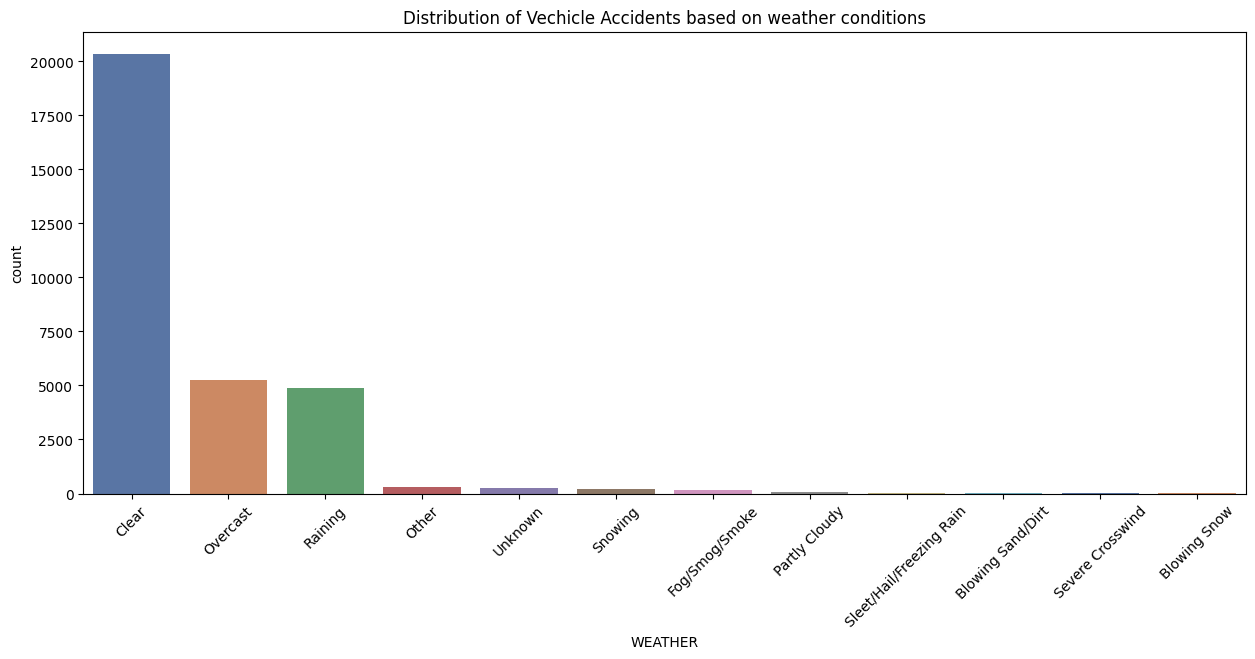

In [ ]:
# Filter the dataframe for a column values with their respective counts
filter_df = df["WEATHER"].value_counts().reset_index()

# Creating a bar chart
plt.figure(figsize=(15, 6))
color_palette = sns.color_palette("deep", len(filter_df))
sns.barplot(data=filter_df, x=filter_df.columns[0], y=filter_df.columns[1],
            hue=filter_df.columns[0], palette=color_palette, legend=False)
plt.xticks(rotation=45)
plt.title("Distribution of Vechicle Accidents based on weather conditions")
plt.show()

* **Clear Weather = Most Accidents:** Surprisingly, most collisions happen in clear conditions — likely due to higher traffic and relaxed driving behavior.

* **Bad Weather = Fewer Crashes:** Fewer people drive in rain, snow, or fog — and those who do are more cautious.

From this bar plot, we see that ideal conditions don’t guarantee safety. Most accidents happen when drivers feel safest — so caution is always crucial.




#### 4.1.2 Pie Charts

**Pie charts** use slices of a circle to represent the proportion of data points in different categories. Pie charts are a popular visualization technique for data that can be broken down into categories or parts that make up a whole. They are useful for showing how much each category contributes to the whole and for comparing the relative sizes of each category.

Pie charts are easy to read and understand, making them a great choice for presenting data to a non-technical audience. They can also be visually appealing and help to highlight important points in the data.

However, pie charts also have some limitations. They can be difficult to read accurately when there are too many categories, and it can be hard to compare categories that are not adjacent to each other. In addition, it can be challenging to show changes over time or to compare multiple data sets with pie charts.


**🚨 Visualizing the Distribution of Collision Severity (SEVERITYCODE)**

<center>

| Severity Code | Description         |
|---------------|---------------------|
| 3             | Fatality            |
| 2b            | Serious Injury      |
| 2             | Injury              |
| 1             | Property Damage     |
| 0             | Unknown             |

</center>

In [ ]:
# Map severity codes to their descriptions
severity_mapping = {
    '3': 'Fatality',
    '2b': 'Serious Injury',
    '2': 'Injury',
    '1': 'Property Damage',
    '0': 'Unknown'
}

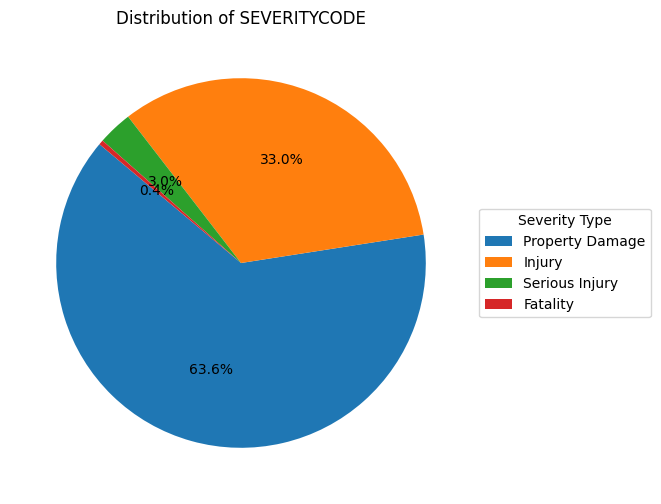

In [ ]:
# Get severity column and apply mapping
filter_df = df["SEVERITYCODE"].map(severity_mapping)
value_counts = filter_df.value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=None, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of SEVERITYCODE")
plt.legend(value_counts.index, title="Severity Type", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

**💡 What the chart tells us about Collision Severity**  

- 🚗 **Property Damage Dominates:** Most collisions are thankfully minor, involving just vehicle damage without harm to people — this makes up the bulk of the dataset.

- 💥 **Serious Injuries & Fatalities are Rare:** Life-threatening outcomes are quite uncommon, showing up only in a small fraction of the incidents.

- 📉 **Sharp Drop with Severity:** As the severity increases, the number of cases drops drastically — it’s a steep slide from minor fender-benders to critical accidents.

**🚨 Visualizing the Distribution of Accidents by Address Type & Weather Conditions**

In [ ]:
df['ADDRTYPE'].value_counts()

ADDRTYPE
Block           18032
Intersection    13440
Alley              88
Name: count, dtype: int64

In [ ]:
df['WEATHER'].value_counts()

WEATHER
Clear                       20355
Overcast                     5240
Raining                      4883
Other                         290
Unknown                       234
Snowing                       230
Fog/Smog/Smoke                147
Partly Cloudy                  70
Sleet/Hail/Freezing Rain       42
Blowing Sand/Dirt              14
Severe Crosswind                6
Blowing Snow                    2
Name: count, dtype: int64

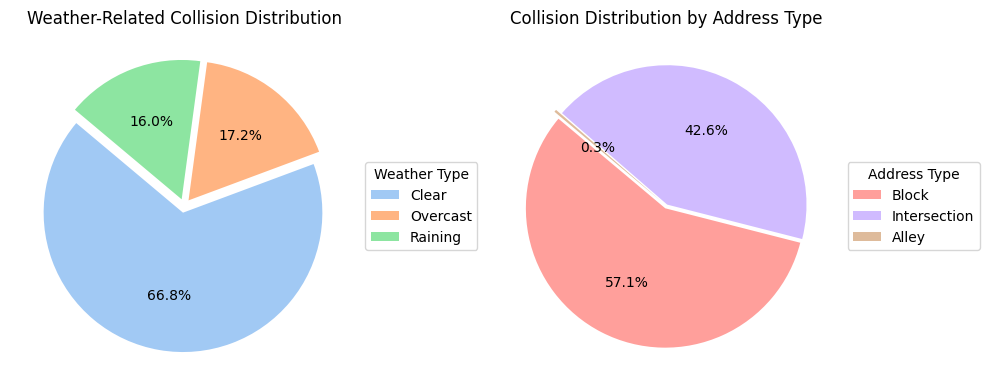

In [ ]:
# Filter relevant top 3 weather types
weather_counts = df["WEATHER"].value_counts()[:3]

# Address Type value counts
addr_counts = df['ADDRTYPE'].value_counts()

# Explodes
weather_explode = [0.05 if i < 3 else 0.02 for i in range(len(weather_counts))]
addr_explode = [0.02, 0.01, 0.05][:len(addr_counts)]

# Colors
weather_colors = sns.color_palette("pastel")[0:len(weather_counts)]
addr_colors = sns.color_palette("pastel")[len(weather_counts):len(weather_counts)+len(addr_counts)]

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Pie chart 1: Weather
axs[0].pie(weather_counts, labels=None, autopct='%1.1f%%', startangle=140,
           explode=weather_explode, colors=weather_colors)
axs[0].set_title("Weather-Related Collision Distribution")
axs[0].legend(weather_counts.index, title="Weather Type", loc="center left", bbox_to_anchor=(1, 0.5))

# Pie chart 2: Address Type
axs[1].pie(addr_counts, labels=None, autopct='%1.1f%%', startangle=140,
           explode=addr_explode, colors=addr_colors)
axs[1].set_title("Collision Distribution by Address Type")
axs[1].legend(addr_counts.index, title="Address Type", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


**💡 Collision by Weather Condition**

* **Clear skies = most crashes** – Looks like good weather makes us a bit too relaxed behind the wheel.

* **Rainy days** – Fewer crashes, probably because we’re all more cautious.

* **Overcast** – Slightly riskier than rain? Maybe dull light messes with visibility.

**💡 Collision by Address Type**

* **Blocks lead** – Most crashes happen between intersections. Everyday roads = everyday risks.

* **Intersections** – Turns, stops, and cross-traffic = prime crash spots.

* **Alleys** – Almost crash-free zones. Quiet, slow, and safe!

#### 4.1.3 Line Charts

Line charts use lines to represent trends in data over time or across a continuous variable. They are useful for showing how data changes over time. Line charts are a popular data visualization technique because they can effectively convey trends and patterns over time or other ordered categories. They are useful for displaying changes in data values over a continuous range, and they can help identify patterns or irregularities in the data.

For instance, line charts can be used to visualize stock prices over a period of time, or to display trends in temperature over the course of a year. They can also be used to compare multiple trends on a single chart, making it easy to see how they are related.

In addition to being effective at showing trends and patterns, line charts are relatively easy to read and interpret, even for individuals without a background in data analysis. The simple and straightforward nature of line charts makes them a powerful tool for communicating complex information in a clear and concise manner.

**🚨 Visualizing the Distribution of Accidents across Year and Months**

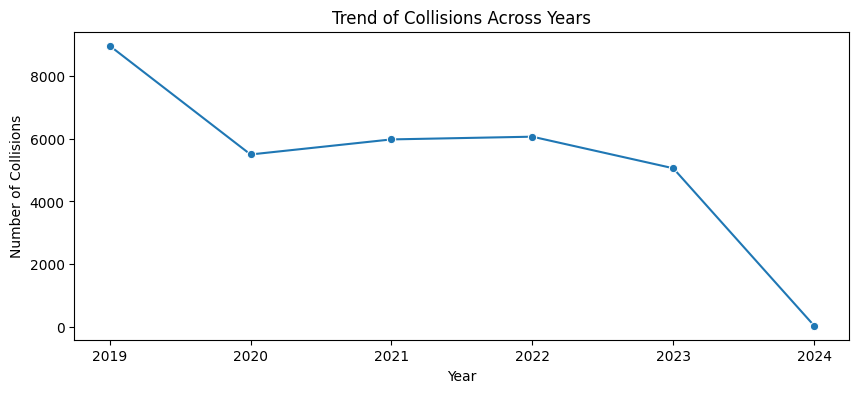

In [ ]:
# Plotting annual trend
yearly_counts = df["YEAR"].value_counts().sort_index()

plt.figure(figsize=(10, 4))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.title("Trend of Collisions Across Years")
plt.xlabel("Year")
plt.ylabel("Number of Collisions")
plt.show()

**Yearly Collision Trends**

🚗 The number of collision accidents doesn’t show a clear trend until **2019**, but afterward, there's a noticeable **decline**. This dip aligns with factors like **increased driver awareness**, **improved road safety measures**, **enhanced vehicle braking systems**, and **stricter traffic law enforcement**.

🦠 **Notably, the sharpest drop occurred during the COVID-19 pandemic (2020–2021)**, when lockdowns and travel restrictions significantly reduced road traffic.

> **Note:** The dataset is up to date until **mid 2024**, capturing recent trends and allowing for current, relevant insights into collision patterns.

In [ ]:
import calendar

# Get 3-letter month abbreviations
monthly_counts = df["MONTH"].value_counts().sort_index()
month_abbr = [calendar.month_abbr[i] for i in monthly_counts.index]
month_abbr

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

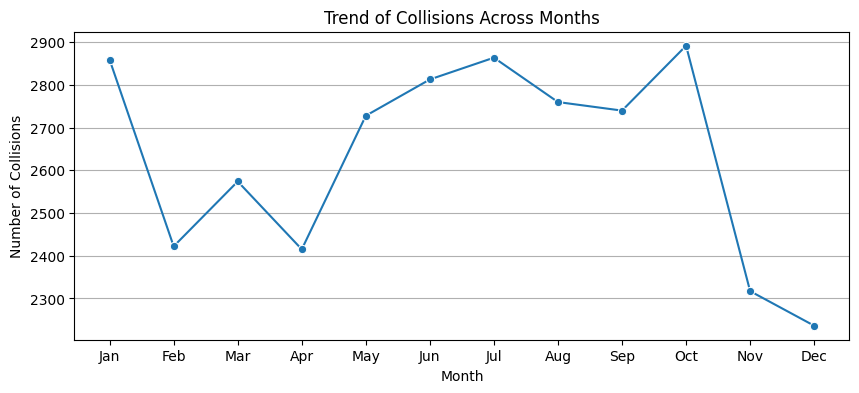

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=month_abbr, y=monthly_counts.values, marker="o")
plt.title("Trend of Collisions Across Months")
plt.xlabel("Month")
plt.ylabel("Number of Collisions")
plt.grid(axis='y')  # Only horizontal grid lines
plt.show()

**Monthly Collision Trends**

* **🔥 Summer Surge:** More collisions from **May to October**, likely due to increased traffic.

* **📉 Year-End Drop:** Sharp decline in **November and December**, possibly from holidays, or reduced commuting.

* **📈 October Peak:** A surprising spike in **October**—might need a deeper look!


#### 4.1.4 Pareto Diagram

A __Pareto diagram__ (or Pareto chart) is a type of bar chart combined with a line graph that helps identify the most important factors in a dataset. It’s based on the Pareto principle, also called the _80/20_ rule, which states that **roughly _80%_ of effects come from _20%_ of causes.**  

**Key features of a Pareto diagram:**

- Bars represent the frequency or count of different categories, arranged in descending order from left to right.

- A line graph shows the cumulative percentage of the total.
- The goal is to highlight which few categories contribute the most to a problem or situation.

**🚨 Visualizing Vehicle collisions on Time**


In [ ]:
df_time = pd.DataFrame({'TIME' : ['00:00 to 04:00',
                                  '04:00 to 08:00',
                                  '08:00 to 12:00',
                                  '12:00 to 16:00',
                                  '16:00 to 20:00',
                                  '20:00 to 00:00']},index=['Late Night','Early Morning',
                                                            'Morning','Noon','Evening','Night'])
df_time

,TIME
Late Night,00:00 to 04:00
Early Morning,04:00 to 08:00
Morning,08:00 to 12:00
Noon,12:00 to 16:00
Evening,16:00 to 20:00
Night,20:00 to 00:00


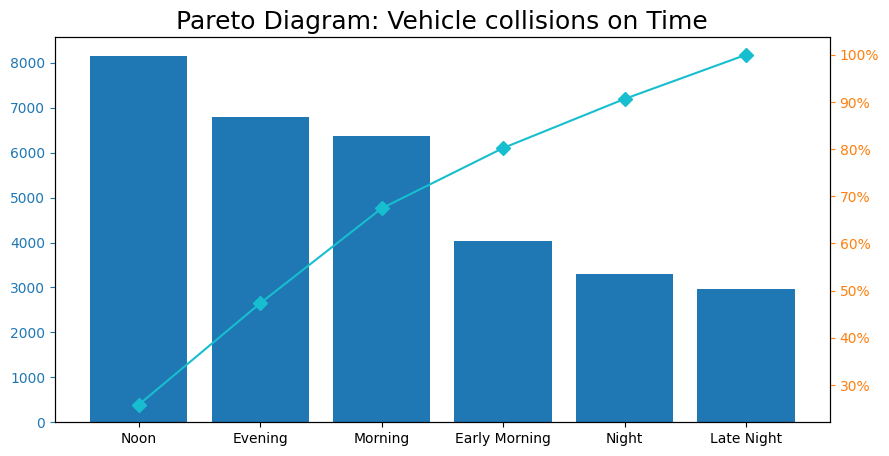

In [ ]:
df_TOD = pd.DataFrame(df['OBJECTID'].groupby(df['TIMEOFDAY'].astype('object')).count())
df_TOD = df_TOD.sort_values(by='OBJECTID', ascending=False)
df_TOD["cumpercentage"] = df_TOD["OBJECTID"].cumsum() / df_TOD["OBJECTID"].sum() * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.bar(df_TOD.index, df_TOD["OBJECTID"], zorder=1)
ax2.plot(df_TOD.index, df_TOD["cumpercentage"], color="C9", marker="D", ms=7, zorder=2)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.title("Pareto Diagram: Vehicle collisions on Time", fontsize=18)
plt.show()



- According to the chart, we can see that most collisions happen during the day, with the highest number occurring at noon i.e. between __`12:00` P.M.__ to __`4:00` P.M.__ followed by Evening and Morning. These three periods together account for most collisions.

- Early Morning and Night see far fewer incidents.

> Focusing safety efforts on Noon, Morning, and Evening could significantly cut collisions.

#### 4.1.5 Histograms

Histograms are used to represent the **distribution of continuous numerical data**. Unlike bar plots that compare categories, histograms group data into **intervals (or "bins")** and show how many data points fall into each range.

They are particularly useful for understanding the **shape**, **spread**, and **center** of a dataset. By visualizing how values are distributed across intervals, histograms can reveal important characteristics such as skewness, modality (peaks), and the presence of outliers.

For example, histograms can be used to visualize the distribution of vehicle speeds, ages of drivers, or accident durations. They help answer questions like:

* Are most drivers involved in accidents between the ages of 20 and 30?
* Is the distribution of accident times skewed toward a particular range?

Histograms are a fundamental data visualization technique in exploratory data analysis (EDA). They provide a **quick and intuitive** way to grasp the underlying patterns in large sets of continuous data, even for those without a technical background.


In [ ]:
# Numerical only columns
numerical_only_filtered_columns = ["PERSONCOUNT",
                                   "PEDCOUNT",
                                   "PEDCYLCOUNT",
                                   "VEHCOUNT",
                                   "INJURIES",
                                   "SERIOUSINJURIES",
                                   "FATALITIES"]

remove_columns = ["OBJECTID",
                  "LOCATION",
                  "x", "y"]

category_df = df.drop(columns=numerical_only_filtered_columns + remove_columns)

In [ ]:
def plot_hist(df, ncols):
    """
    Plots histograms for all numeric columns in the dataframe.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    ncols (int): Number of columns per row in the subplot grid.
    """
    n = len(df.columns)
    nrows = round(n / ncols) + 1
    plt.figure(figsize=(15, 30))  # set figure size once before the loop

    for indx in range(n):
        col = df.columns[indx]
        plt.subplot(nrows, ncols, indx + 1, title=col)
        df[col].hist(bins=len(df[col].unique()))
        plt.xticks(rotation=35, fontsize=8)
        plt.grid(False)  # horizontal grid lines only

    plt.tight_layout()
    plt.show()

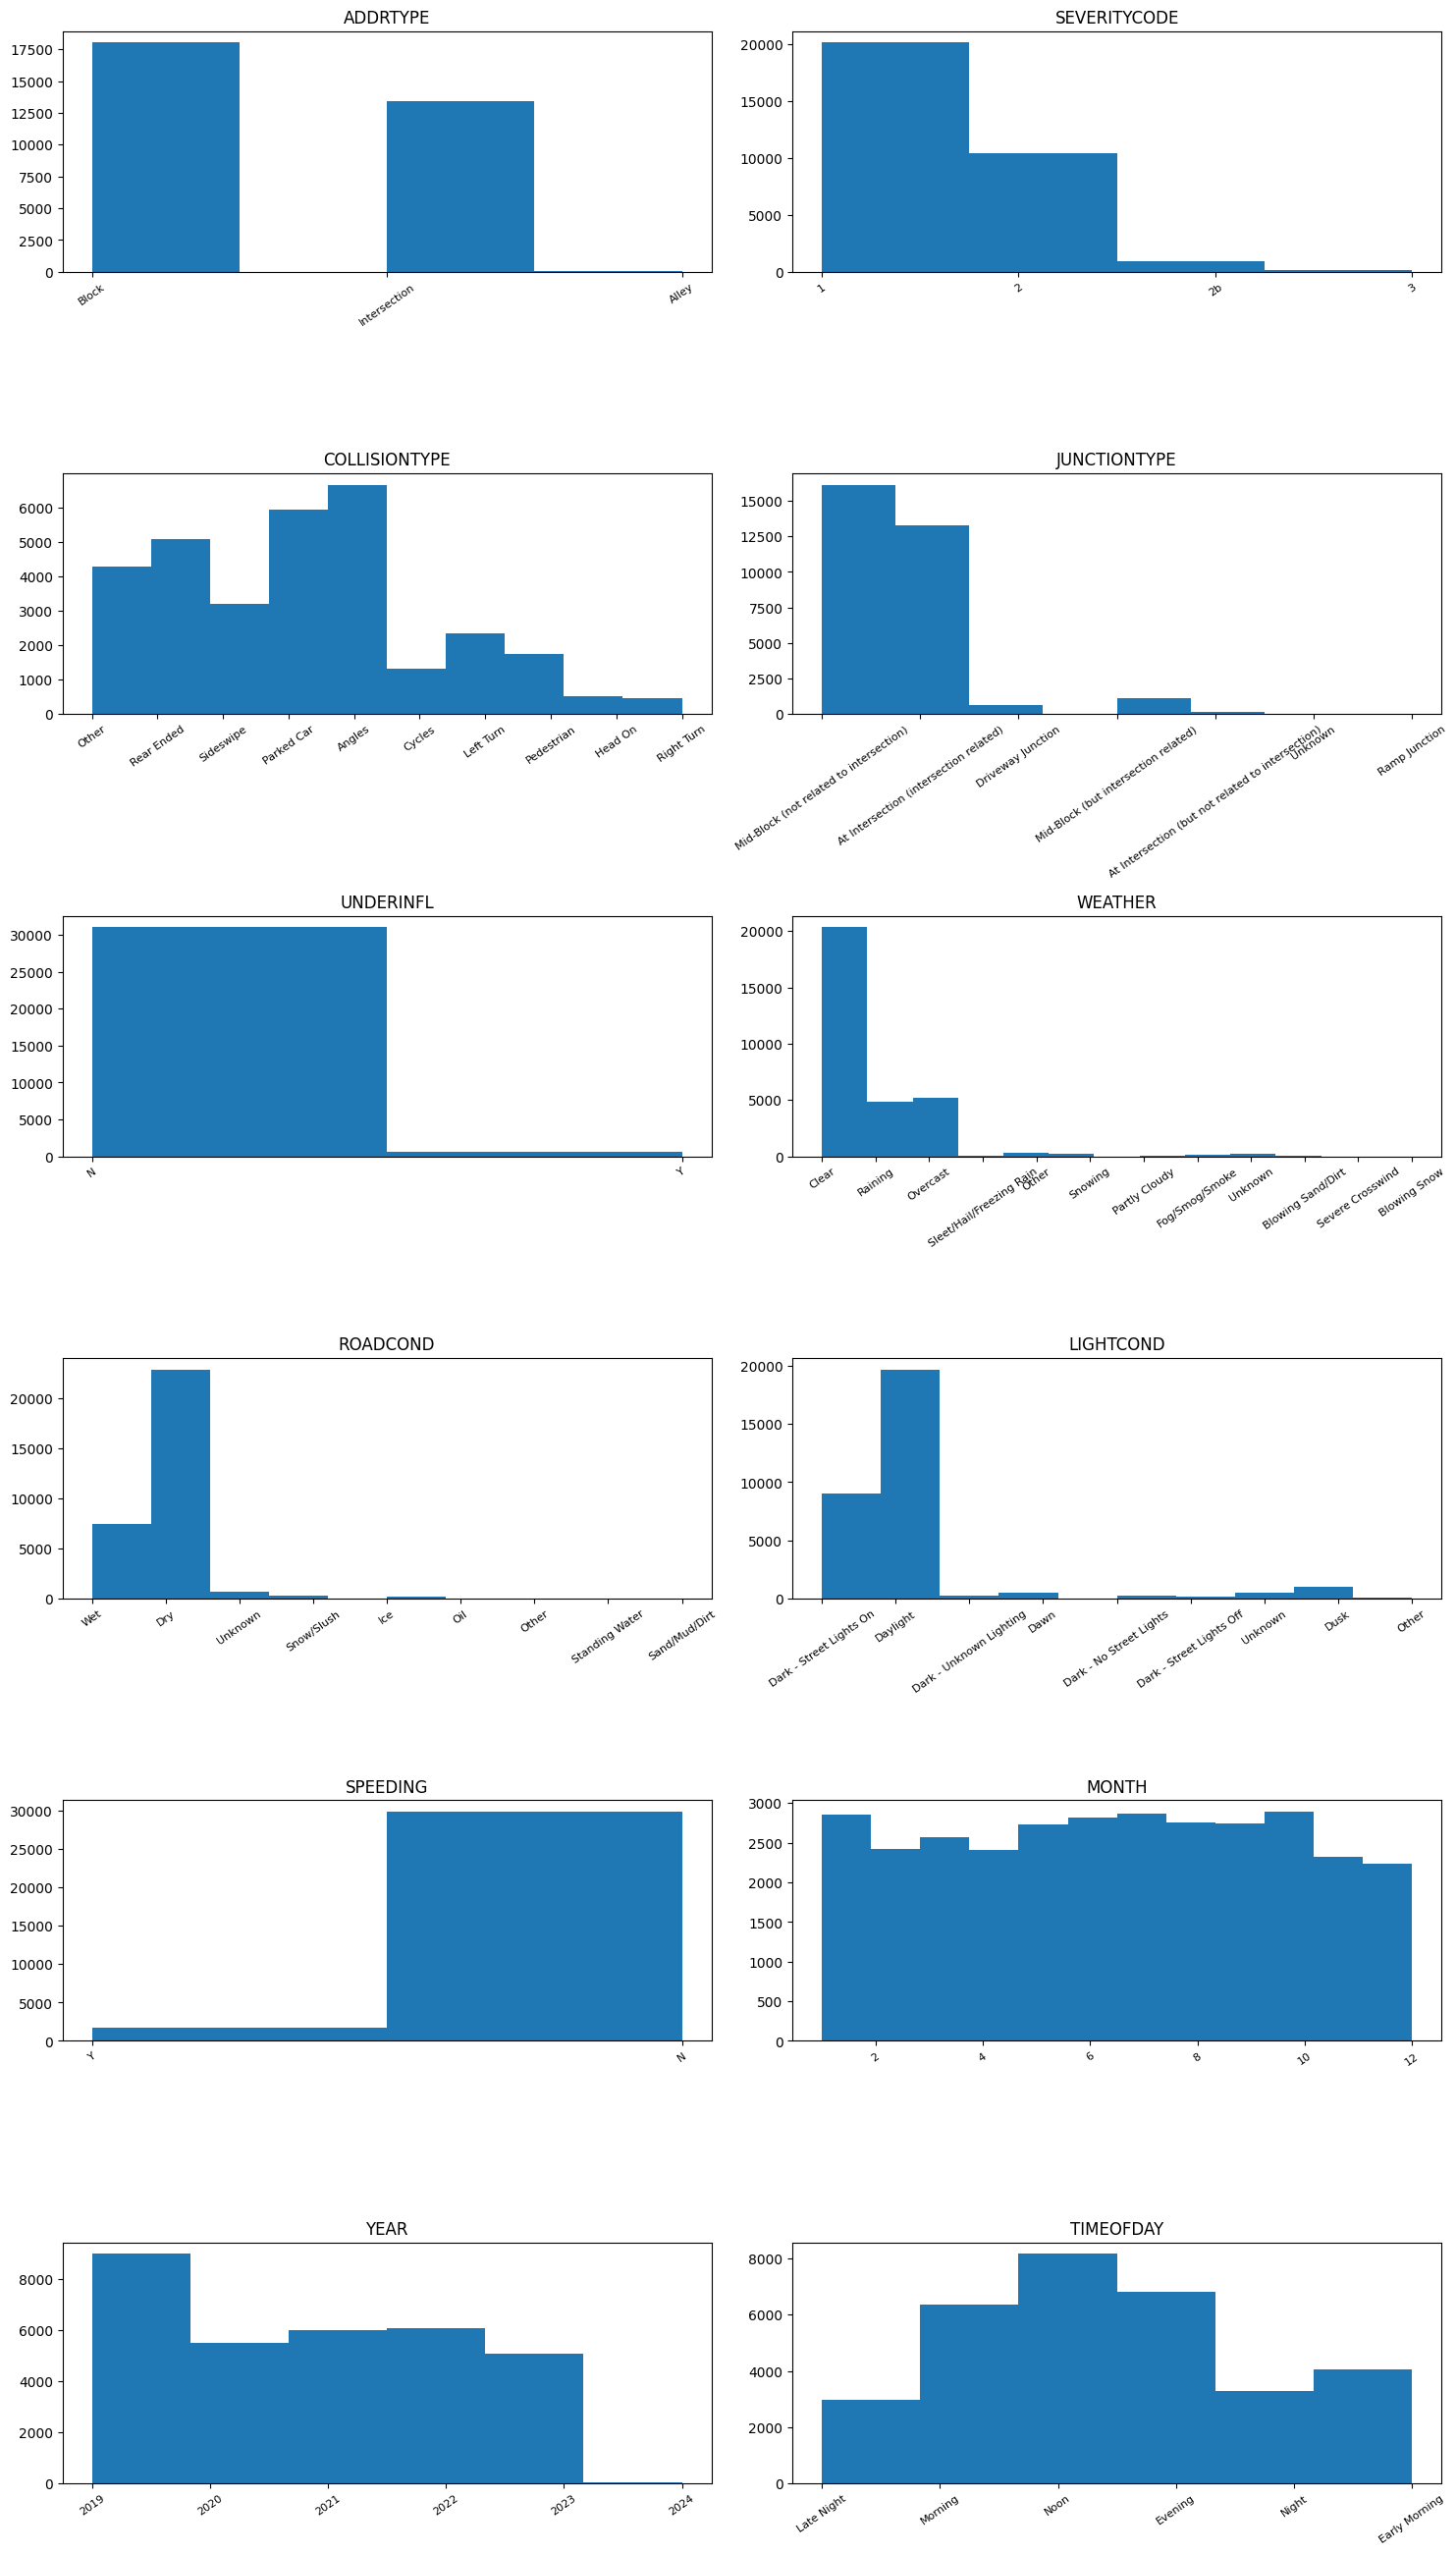

In [ ]:
# Hist Plots
plot_hist(category_df, 2)

## 5. Summary of Univariate Data Analysis Report on Road Traffic Accidents in Seattle

<img src = "https://res.cloudinary.com/jerrick/image/upload/c_scale,f_jpg,q_auto/gclqhqnlr33f8zuqk8nh.jpg">


This report analyzes a dataset provided by the Seattle Department of Transportation (SDOT) to identify patterns and factors contributing to traffic accidents. Here are the key findings:

**Univariate Analysis:**

* **Severity:** Property damage is the most common collision outcome, likely due to damage to vehicles and infrastructure.

* **Collision Types:** Most collisions involve multiple vehicles, potentially due to carelessness or illegal maneuvers (like not checking mirrors or improper parking). Right-turn dominance is evident, with left-turn accidents being less frequent. Further investigation is needed for specific collision types (angle, sideswipe, pedestrian) to understand the role of speeding and weather conditions.
* **Collision Trends:** The number of accidents shows a slight decrease after 2019, possibly due to improved driver awareness, road safety measures, and stricter traffic law enforcement during COVID pandemic period.
* **Time of Day:** Most collisions occur during the day, with a peak at noon. The fewest occur at night.

In this next chapter, we’ll dive deep into **Bivariative and Multivariative analysis**, where multiple variables interact to tell a more complete story.